In [1]:
from hashstash.profilers.serialize_profiler import *
# run_comparisons(10000)
stash = compare_serializers.stash
# stash.clear()
df = stash.df
# # df = df[~df.data_type.str.contains('prosodic')]
df

,_key,data_type,decode_deserialize_time,decode_time,deserialize_speed,deserialize_time,encode_serialize_time,encode_time,encoding,input_size_mb,serialize_speed,serialize_time,serializer_name,size_mb
0,bf66dcdfea434deeb5a1bfcff3a56201,builtins.dict,0.001680,1.935959e-04,31.252726,0.001487,0.003327,1.650333e-03,compressed.b64,0.046466,27.707137,0.001677,custom,0.038883
1,bf66dcdfea434deeb5a1bfcff3a56201,builtins.dict,0.001599,1.118183e-04,31.252726,0.001487,0.003141,1.463890e-03,compressed,0.046466,27.707137,0.001677,custom,0.029162
2,bf66dcdfea434deeb5a1bfcff3a56201,builtins.dict,0.001612,1.249313e-04,31.252726,0.001487,0.001749,7.200241e-05,b64,0.046466,27.707137,0.001677,custom,0.061954
3,bf66dcdfea434deeb5a1bfcff3a56201,builtins.dict,0.001488,1.192093e-06,31.252726,0.001487,0.001679,1.907349e-06,raw,0.046466,27.707137,0.001677,custom,0.046466
4,bf66dcdfea434deeb5a1bfcff3a56201,builtins.dict,0.001983,1.997948e-04,26.051597,0.001784,0.002341,1.498699e-03,compressed.b64,0.046466,55.178935,0.000842,jsonpickle,0.038883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130083,ebdef816d03143165ac9a19c61cad32f,builtins.float,0.000003,9.536743e-07,8.000000,0.000002,0.000003,1.192093e-06,raw,0.000017,8.000000,0.000002,orjson,0.000017
130084,ebdef816d03143165ac9a19c61cad32f,builtins.float,0.000004,2.145767e-06,8.000000,0.000002,0.000006,2.861023e-06,compressed.b64,0.000017,5.538462,0.000003,json,0.000034
130085,ebdef816d03143165ac9a19c61cad32f,builtins.float,0.000003,9.536743e-07,8.000000,0.000002,0.000006,3.099442e-06,compressed,0.000017,5.538462,0.000003,json,0.000025
130086,ebdef816d03143165ac9a19c61cad32f,builtins.float,0.000003,9.536743e-07,8.000000,0.000002,0.000004,9.536743e-07,b64,0.000017,5.538462,0.000003,json,0.000023


In [2]:
# df=pd.DataFrame([1,2,3,4])
# compare_serializers(df)

In [3]:
df.data_type.value_counts()

data_type
builtins.list                  33648
builtins.dict                  32208
numpy.ndarray                  27020
pandas.core.frame.DataFrame    16548
builtins.float                  7224
builtins.int                    6792
builtins.str                    6576
builtins.bool                     48
builtins.NoneType                 24
Name: count, dtype: int64

In [4]:
df=df[~df.encoding.isna()]
# df

In [5]:
pd.options.display.max_rows=None

def summarize_by_group(df, group_by=['data_type','serializer_name'], sort_by=['deserialize_speed']):
    df = df.copy()
    df['data_type'] = df['data_type'].apply(lambda x: x.split('.')[-1] if x.split('.')[0]=='builtins' else x)
    dfgrp = df.groupby(group_by).sum(numeric_only=True)
    dfgrp['serialize_speed'] = dfgrp['input_size_mb'] / dfgrp['serialize_time']
    dfgrp['deserialize_speed'] = dfgrp['input_size_mb'] / dfgrp['deserialize_time']
    dfgrp['encode_speed'] = dfgrp['input_size_mb'] / dfgrp['encode_time']
    dfgrp['decode_speed'] = dfgrp['input_size_mb'] / dfgrp['decode_time']
    dfgrp['encode_serialize_speed'] = dfgrp['input_size_mb'] / dfgrp['encode_serialize_time']
    dfgrp['decode_deserialize_speed'] = dfgrp['input_size_mb'] / dfgrp['decode_deserialize_time']
    dfgrp['encode_decode_serialize_deserialize_speed'] = dfgrp['input_size_mb'] / (dfgrp['encode_serialize_time']+dfgrp['decode_deserialize_time'])
    return dfgrp.sort_values(sort_by, ascending=False)
    
odf=summarize_by_group(df, sort_by=['data_type','serialize_speed'])

In [6]:
# summarize_by_group(df, group_by=['data_type'], sort_by='serialize_speed')


In [7]:
# summarize_by_group(df, group_by=['serializer_name'], sort_by='serialize_speed')

In [8]:
# import plotnine as p9
# p9.options.figure_size=(8,6)
# figdf = summarize_by_group(df, group_by=['serializer_name',])
# fig = p9.ggplot(odf.reset_index(), p9.aes(x='serialize_speed', y='deserialize_speed',label='serializer_name'))
# # fig+= p9.geom_point()
# fig+=p9.geom_text(size=8)
# fig+=p9.scale_x_log10()
# fig+=p9.scale_y_log10()
# fig+=p9.facet_wrap('data_type',ncol=2)#,scales='free')
# fig+=p9.theme_classic()
# fig += p9.theme(legend_position='bottom')
# fig += p9.guides(color=p9.guide_legend(nrow=2, byrow=True))
# fig

In [9]:
# import plotnine as p9
# p9.options.figure_size=(8,6)
# figdf = summarize_by_group(df, group_by=['serializer_name','data_type','encoding']).reset_index()
# fig = p9.ggplot(figdf, p9.aes(x='encode_serialize_speed', y='decode_deserialize_speed',label='serializer_name',color='encoding'))
# fig+=p9.geom_text(size=8)
# # fig+=p9.scale_x_log10()
# # fig+=p9.scale_y_log10()
# fig+=p9.facet_wrap('data_type',ncol=2)#,scales='free')
# fig+=p9.theme_classic()
# fig += p9.theme(legend_position='bottom')
# fig += p9.guides(color=p9.guide_legend(nrow=2, byrow=True))
# fig

In [13]:
import plotnine as p9
p9.options.figure_size=(9,8)
figdf = summarize_by_group(df, group_by=['serializer_name','data_type']).reset_index()
# figdf = figdf[figdf.encoding=='raw']
figdf = figdf[~figdf.data_type.str.contains('Series')]
figdf = figdf[~figdf.data_type.str.contains('float')]
figdf = figdf[~figdf.data_type.str.contains('bool')]
figdf = figdf[~figdf.data_type.str.contains('None')]
figdf = figdf[~figdf.data_type.str.contains('int')]
figdf = figdf[~figdf.data_type.str.contains('str')]
# figdf['encoding'] = figdf['encoding'].apply(lambda x: x.replace('compressed','zlib'))
figdf

,serializer_name,data_type,decode_deserialize_time,decode_time,deserialize_speed,deserialize_time,encode_serialize_time,encode_time,input_size_mb,serialize_speed,serialize_time,size_mb,encode_speed,decode_speed,encode_serialize_speed,decode_deserialize_speed,encode_decode_serialize_deserialize_speed
0,pickle,numpy.ndarray,13.656851,13.177424,13281.441776,0.479427,80.431115,79.120081,6367.486271,4856.842223,1.311034,5413.449313,80.478763,483.211764,79.166952,466.248488,67.675883
1,pickle,dict,1.150132,0.590935,453.458521,0.559197,3.421607,2.922163,253.572838,507.710241,0.499444,198.805504,86.775726,429.104802,74.109276,220.472825,55.465289
2,pickle,list,0.239915,0.125196,446.834702,0.114719,0.660854,0.551585,51.260605,469.122424,0.109269,40.380248,92.933330,409.443677,77.567232,213.661407,56.907604
3,orjson,dict,1.210288,0.595448,412.420514,0.614841,4.374277,4.030437,253.572838,737.472069,0.343841,232.522315,62.914485,425.852524,57.969084,209.514453,45.406013
4,orjson,list,0.252098,0.126498,408.126286,0.125600,0.800179,0.707423,51.260605,552.637618,0.092756,47.397816,72.461041,405.229395,64.061403,203.336341,48.713991
5,pickle,pandas.core.frame.DataFrame,6.710345,2.850631,335.603937,3.859714,20.666130,17.227631,1295.335064,376.715216,3.438499,1010.213984,75.189391,454.402925,62.679130,193.035552,47.315627
6,custom,numpy.ndarray,38.202320,16.615211,294.967074,21.587109,154.132947,126.680267,6367.486271,231.944063,27.452681,6504.858597,50.264232,383.232334,41.311649,166.677999,33.106182
7,jsonpickle,numpy.ndarray,38.518346,16.589230,290.366753,21.929116,154.556304,126.943477,6367.486271,230.598852,27.612827,6506.003310,50.160012,383.832538,41.198490,165.310479,32.979401
8,orjson,numpy.ndarray,43.911688,21.668690,286.269245,22.242998,386.380328,368.892878,6367.486271,364.117470,17.487451,9783.158978,17.261071,293.856541,16.479841,145.006638,14.798058
9,jsonpickle_ext,numpy.ndarray,50.123969,15.442802,183.600689,34.681168,291.995258,115.014655,6367.486271,35.978441,176.980603,6154.155633,55.362391,412.327140,21.806814,127.034757,18.611892


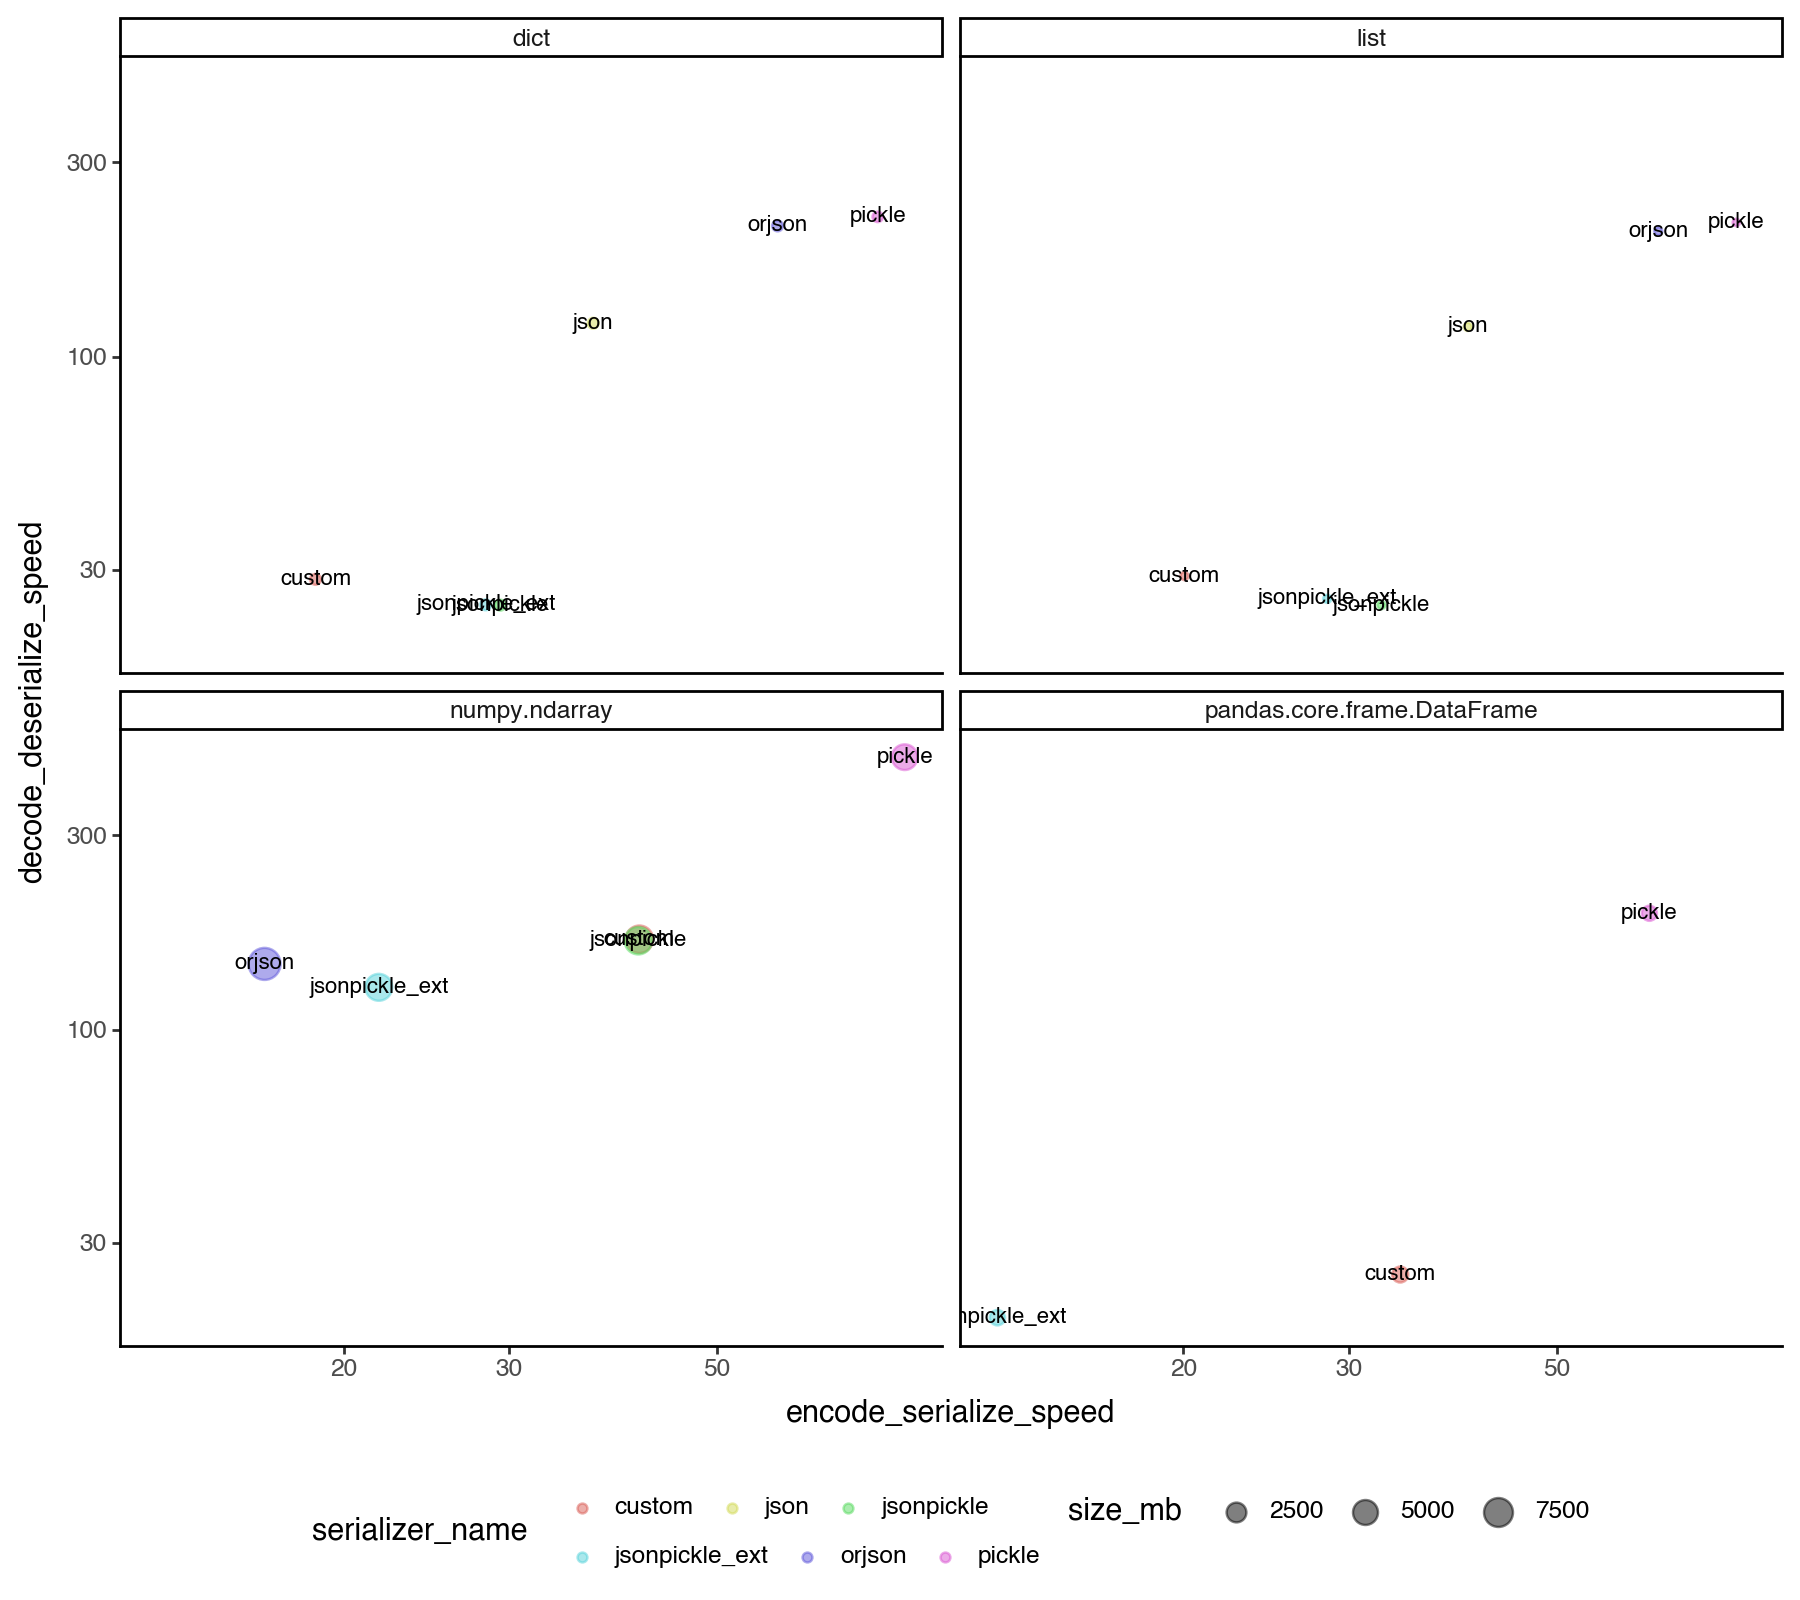

In [14]:
fig = p9.ggplot(figdf, p9.aes(x='encode_serialize_speed', y='decode_deserialize_speed',label='serializer_name', color='serializer_name', size='size_mb'))
fig+=p9.geom_point(alpha=.5)
fig+=p9.geom_text(size=8,color='black')
fig+=p9.scale_x_log10()
fig+=p9.scale_y_log10()
fig+=p9.facet_wrap('data_type',ncol=2)
fig+=p9.theme_classic()
fig += p9.theme(legend_position='bottom')
fig += p9.guides(color=p9.guide_legend(nrow=2, byrow=True))
fig

In [28]:
# df.encoding

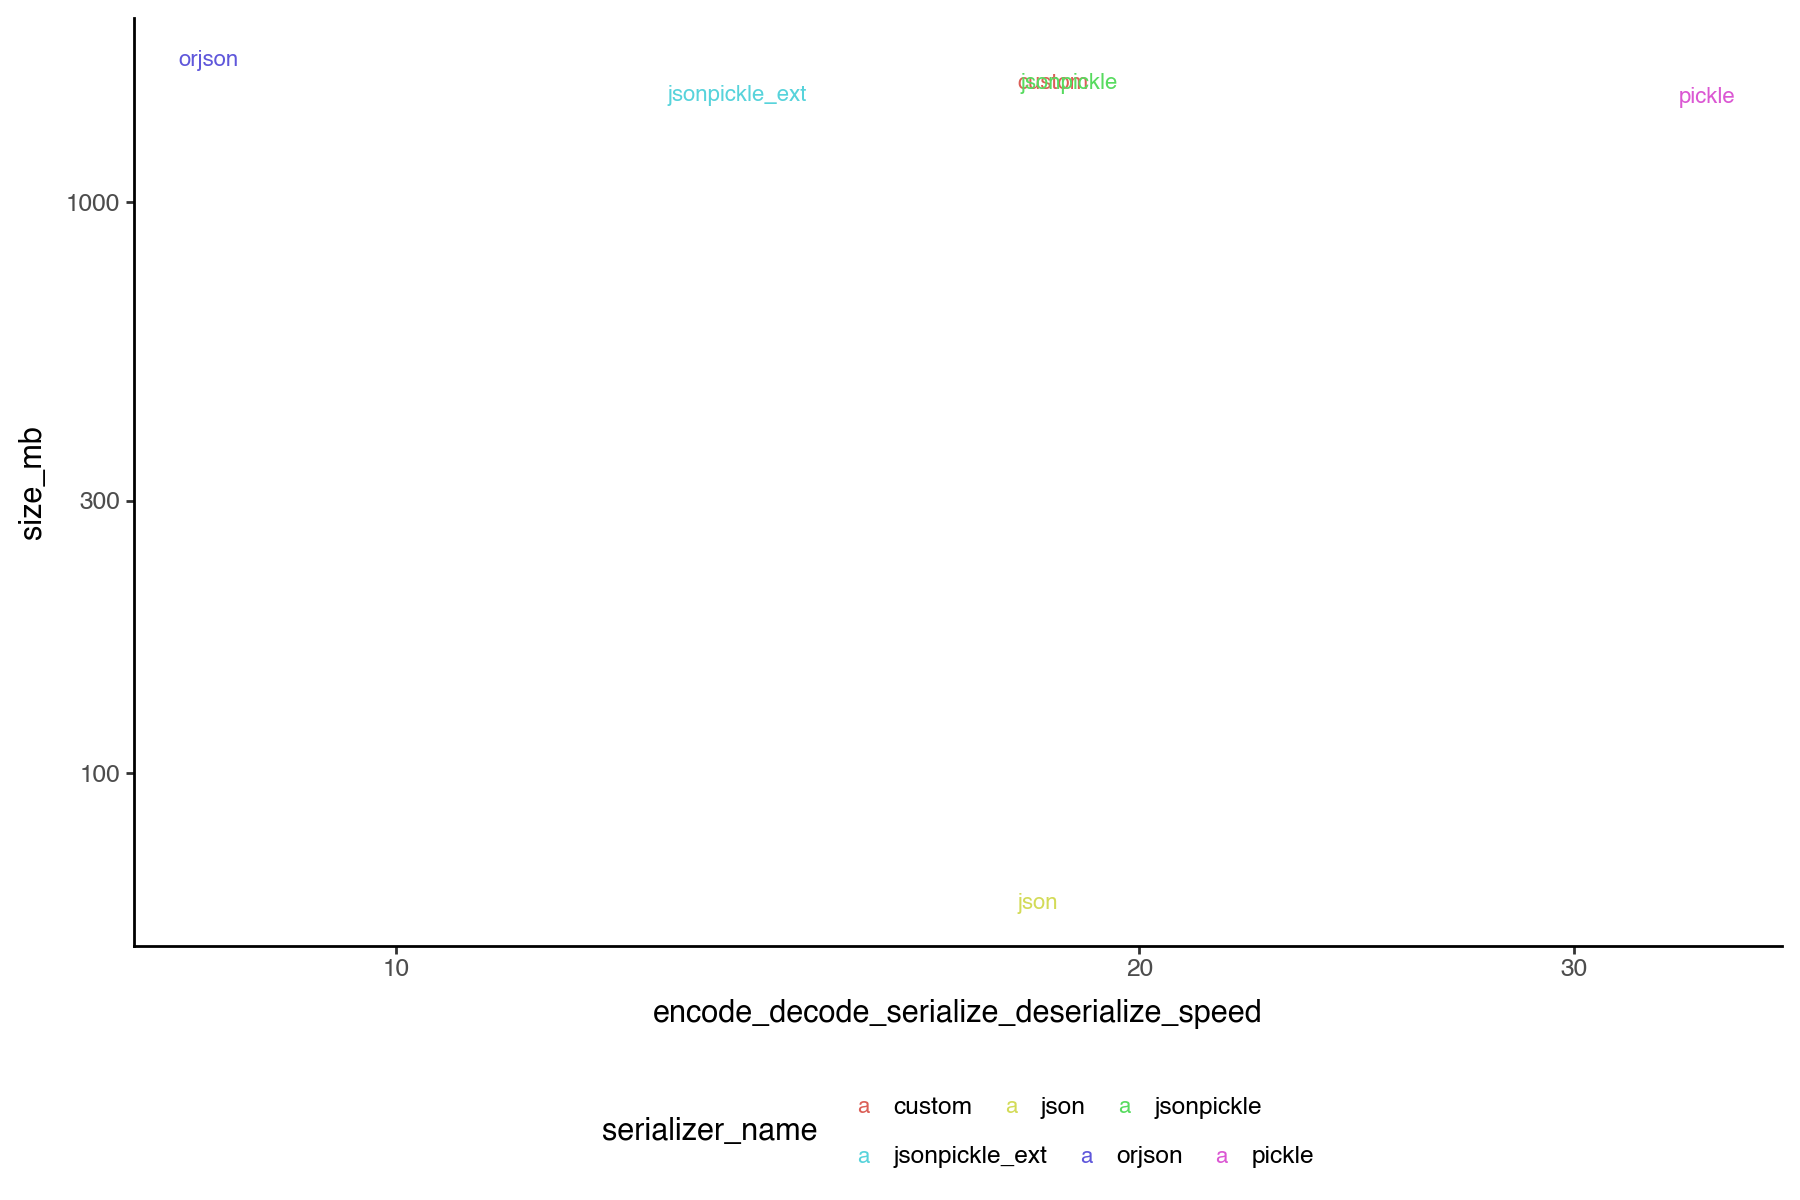

In [31]:
import plotnine as p9
p9.options.figure_size=(9,6)
figdf = summarize_by_group(df[df.encoding=='compressed.b64'], group_by=['serializer_name']).reset_index()
fig = p9.ggplot(figdf, p9.aes(x='encode_decode_serialize_deserialize_speed', y='size_mb', label='serializer_name', color='serializer_name'))
fig+=p9.geom_text(size=8)
fig+=p9.scale_x_log10()
fig+=p9.scale_y_log10()
# fig+=p9.facet_wrap('data_type',ncol=3)
fig+=p9.theme_classic()
fig += p9.theme(legend_position='bottom')
fig += p9.guides(color=p9.guide_legend(nrow=2, byrow=True))
fig